<center><h1>Luo_Xiao_HW8</h1></center>

Name: Xiao Luo
<br>
Github Username: xluo23
<br>
USC ID: 2392693288
<br>
Late Days Used for HW8: 1

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score, auc, roc_curve, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import warnings

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [310]:
df =  pd.read_csv('data/wdbc.data', header=None)
df.columns=['ID','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
# df
X = df.drop(['ID','Diagnosis'],axis=1)

X_normalized = pd.DataFrame(preprocessing.normalize(X),columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30'])
df_normalized = pd.concat([df[['Diagnosis']],X_normalized],axis=1)
df_normalized

,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,M,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,M,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,M,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,M,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,M,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.008541,0.008870,0.056256,0.585933,0.000044,0.000046,0.000097,0.000055,0.000068,...,0.010082,0.010459,0.065804,0.803033,0.000056,0.000084,0.000163,0.000088,0.000082,0.000028
565,M,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,...,0.010997,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031
566,M,0.011644,0.019696,0.075966,0.601905,0.000059,0.000072,0.000065,0.000037,0.000112,...,0.013313,0.023933,0.088872,0.788417,0.000080,0.000217,0.000239,0.000099,0.000156,0.000055
567,M,0.009230,0.013142,0.062774,0.566806,0.000053,0.000124,0.000157,0.000068,0.000107,...,0.011533,0.017663,0.082713,0.815932,0.000074,0.000389,0.000421,0.000119,0.000183,0.000056


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

Confusion Matrix for Test Set in the first iteration:
 [[42  1]
 [ 0 72]]


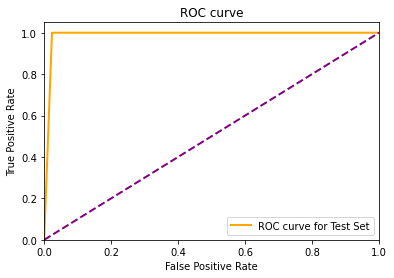

Confusion Matrix for Training Set in the first iteration:
 [[164   5]
 [  0 285]]


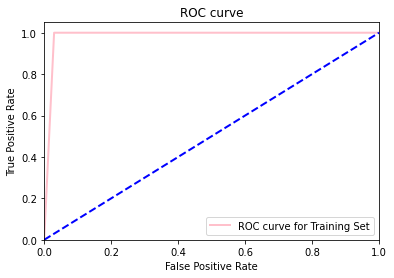

The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:
Average accuracy: 0.9614492753623188
Average precision: 0.9621750655523499
Average recall: 0.9773148148148146
Average F1-score: 0.9695162692279514
Average AUC: 0.9560992678725238

The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:
Average accuracy: 0.9888399412628488
Average precision: 0.987028995503313
Average recall: 0.9953216374269007
Average F1-score: 0.9911500479912491
Average AUC: 0.9866154538219316


In [41]:
warnings.filterwarnings('ignore')
Accuracy_train = []
Precision_train = []
Recall_train = []
F1score_train = []
AUC_train = []

Accuracy_test = []
Precision_test = []
Recall_test = []
F1score_test = []
AUC_test = []

for m in range(1,31):
    # print(f"---------------------------------------- M = {m} ----------------------------------------")
    B_df = df[df['Diagnosis'] == 'B']
    M_df = df[df['Diagnosis'] == 'M']
    B_train, B_test = train_test_split(B_df, test_size=0.2)
    M_train, M_test = train_test_split(M_df, test_size=0.2)
    train_set = pd.concat([B_train, M_train])
    test_set = pd.concat([B_test, M_test])

    X_train = train_set.iloc[:,2:]
    y_train = train_set['Diagnosis'].map({'M':0, 'B':1})
    X_test = test_set.iloc[:,2:]
    y_test = test_set['Diagnosis'].map({'M':0, 'B':1})

    C = np.logspace(-3, 6, 10) 
    lsvc = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
    clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)
    c_l1 = clf.best_estimator_.C 
    cv_score_l1 = clf.best_score_
    # print(f"In iteration {m}: The optimal l1 penalty parameter is {c_l1}")

    lsvc = LinearSVC(penalty='l1', dual=False, C=c_l1)
    lsvc.fit(X_train, y_train)

    y_test_pred = lsvc.predict(X_test)
    test_as = accuracy_score(y_test, y_test_pred)
    test_ps = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    test_auc = auc(fpr, tpr)

    Accuracy_test.append(test_as)
    Precision_test.append(test_ps)
    Recall_test.append(test_recall)
    F1score_test.append(test_f1)
    AUC_test.append(test_auc)

    if m == 1: 
        test_cm = confusion_matrix(y_test, y_test_pred)
        print("Confusion Matrix for Test Set in the first iteration:\n", test_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve for Test Set')
        plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

    y_train_pred = lsvc.predict(X_train)
    train_as = accuracy_score(y_train, y_train_pred)
    train_ps = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    fpr, tpr, _ = roc_curve(y_train, y_train_pred)
    train_auc = auc(fpr, tpr)

    Accuracy_train.append(train_as)
    Precision_train.append(train_ps)
    Recall_train.append(train_recall)
    F1score_train.append(train_f1)
    AUC_train.append(train_auc)

    if m == 1: 
        train_cm = confusion_matrix(y_train, y_train_pred)
        print("Confusion Matrix for Training Set in the first iteration:\n", train_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve for Training Set')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()



avg_accuracy_test = np.mean(Accuracy_test)
avg_precision_test = np.mean(Precision_test)
avg_recall_test = np.mean(Recall_test)
avg_f1score_test = np.mean(F1score_test)
avg_auc_test = np.mean(AUC_test)
print('The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_test}') 
print(f'Average precision: {avg_precision_test}')
print(f'Average recall: {avg_recall_test}') 
print(f'Average F1-score: {avg_f1score_test}') 
print(f'Average AUC: {avg_auc_test}\n') 

avg_accuracy_train = np.mean(Accuracy_train)
avg_precision_train = np.mean(Precision_train)
avg_recall_train = np.mean(Recall_train)
avg_f1score_train = np.mean(F1score_train)
avg_auc_train = np.mean(AUC_train)
print('The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_train}') 
print(f'Average precision: {avg_precision_train}')
print(f'Average recall: {avg_recall_train}') 
print(f'Average F1-score: {avg_f1score_train}') 
print(f'Average AUC: {avg_auc_train}') 

#### (ii) Semi-Supervised Learning/ Self-training

##### (A) & (B)

Confusion Matrix for Test Set in the first iteration:
 [[39  4]
 [ 3 69]]


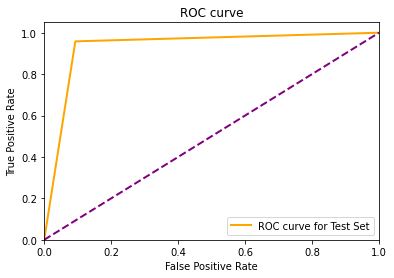

Confusion Matrix for Training Set in the first iteration:
 [[163   0]
 [  0 291]]


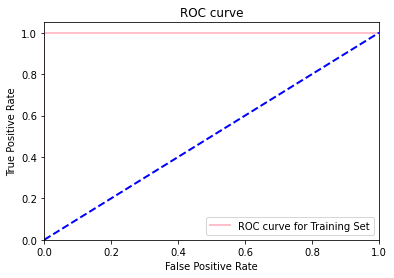

The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:
Average accuracy: 0.9553623188405796
Average precision: 0.9634808590809236
Average recall: 0.9657407407407407
Average F1-score: 0.9643903763728967
Average AUC: 0.951862618432386

The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:
Average accuracy: 0.9957415565345081
Average precision: 0.9955669077888647
Average recall: 0.9976350890488364
Average F1-score: 0.9965949808037547
Average AUC: 0.9950952378736485


In [11]:
warnings.filterwarnings('ignore')
Accuracy_train = []
Precision_train = []
Recall_train = []
F1score_train = []
AUC_train = []

Accuracy_test = []
Precision_test = []
Recall_test = []
F1score_test = []
AUC_test = []

for m in range(1,31):
    B_df = df[df['Diagnosis'] == 'B']
    M_df = df[df['Diagnosis'] == 'M']
    B_train, B_test = train_test_split(B_df, test_size=0.2)
    M_train, M_test = train_test_split(M_df, test_size=0.2)
    train_set = pd.concat([B_train, M_train])
    test_set = pd.concat([B_test, M_test])

    B_labeled, B_unlabeled = train_test_split(B_train, test_size=0.5)
    M_labeled, M_unlabeled = train_test_split(M_train, test_size=0.5)
    labeled_data = pd.concat([B_labeled, M_labeled])
    unlabeled_data = pd.concat([B_unlabeled, M_unlabeled])

    X_train_labeled = labeled_data.iloc[:,2:].reset_index(drop=True)
    y_train_labeled = labeled_data['Diagnosis'].map({'M':0, 'B':1}).reset_index(drop=True)
    X_train_unlabeled = unlabeled_data.iloc[:,2:].reset_index(drop=True)
    X_test = test_set.iloc[:,2:]
    y_test = test_set['Diagnosis'].map({'M':0, 'B':1})

    # 1.b(ii)(A)
    C = np.logspace(-3, 6, 10) 
    lsvc = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
    clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=5)
    clf.fit(X_train_labeled, y_train_labeled)
    c_l1 = clf.best_estimator_.C 
    cv_score_l1 = clf.best_score_
    # print(f"In iteration {m}: The optimal l1 penalty parameter is {c_l1}")


    # 1.b(ii)(B)
    while len(X_train_unlabeled) != 0:
        lsvc = LinearSVC(penalty='l1', dual=False, C=c_l1, max_iter=1000000)
        lsvc.fit(X_train_labeled, y_train_labeled)

        unlabled_Distances = lsvc.decision_function(X_train_unlabeled)
        max_abs_value = max(unlabled_Distances, key=abs)
        max_abs_index = np.argmax(np.abs(unlabled_Distances))

        max_dist_point = pd.DataFrame(X_train_unlabeled.iloc[max_abs_index,:]).T
        pred_label = pd.Series(lsvc.predict(max_dist_point))

        X_train_labeled = pd.concat([X_train_labeled,max_dist_point],axis=0)
        X_train_labeled = X_train_labeled.reset_index(drop=True)

        y_train_labeled = pd.concat([y_train_labeled,pred_label],axis=0)
        y_train_labeled = y_train_labeled.reset_index(drop=True)

        X_train_unlabeled = X_train_unlabeled.drop(index=max_abs_index,axis=0).reset_index(drop=True)

    lsvc = LinearSVC(penalty='l1', dual=False, C=c_l1, max_iter=1000000)
    lsvc.fit(X_train_labeled, y_train_labeled)

    y_test_pred = lsvc.predict(X_test)
    test_as = accuracy_score(y_test, y_test_pred)
    test_ps = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    test_auc = auc(fpr, tpr)

    Accuracy_test.append(test_as)
    Precision_test.append(test_ps)
    Recall_test.append(test_recall)
    F1score_test.append(test_f1)
    AUC_test.append(test_auc)

    if m == 1: 
        test_cm = confusion_matrix(y_test, y_test_pred)
        print("Confusion Matrix for Test Set in the first iteration:\n", test_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve for Test Set')
        plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

    y_train_pred = lsvc.predict(X_train_labeled)
    train_as = accuracy_score(y_train_labeled, y_train_pred)
    train_ps = precision_score(y_train_labeled, y_train_pred)
    train_recall = recall_score(y_train_labeled, y_train_pred)
    train_f1 = f1_score(y_train_labeled, y_train_pred)
    fpr, tpr, _ = roc_curve(y_train_labeled, y_train_pred)
    train_auc = auc(fpr, tpr)

    Accuracy_train.append(train_as)
    Precision_train.append(train_ps)
    Recall_train.append(train_recall)
    F1score_train.append(train_f1)
    AUC_train.append(train_auc)

    if m == 1: 
        train_cm = confusion_matrix(y_train_labeled, y_train_pred)
        print("Confusion Matrix for Training Set in the first iteration:\n", train_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve for Training Set')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

avg_accuracy_test = np.mean(Accuracy_test)
avg_precision_test = np.mean(Precision_test)
avg_recall_test = np.mean(Recall_test)
avg_f1score_test = np.mean(F1score_test)
avg_auc_test = np.mean(AUC_test)
print('The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_test}') 
print(f'Average precision: {avg_precision_test}')
print(f'Average recall: {avg_recall_test}') 
print(f'Average F1-score: {avg_f1score_test}') 
print(f'Average AUC: {avg_auc_test}\n') 

avg_accuracy_train = np.mean(Accuracy_train)
avg_precision_train = np.mean(Precision_train)
avg_recall_train = np.mean(Recall_train)
avg_f1score_train = np.mean(F1score_train)
avg_auc_train = np.mean(AUC_train)
print('The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_train}') 
print(f'Average precision: {avg_precision_train}')
print(f'Average recall: {avg_recall_train}') 
print(f'Average F1-score: {avg_f1score_train}') 
print(f'Average AUC: {avg_auc_train}') 

#### (iii) Unsupervised Learning

##### (A)

To make sure that the algorithm does not get trapped in local minimum, we run the k-means algorithm multiple times with different random initializations, and choose the run with the smallest sum of squared distances as the final solution.

##### (B) & (C)

------------------------------------- 1.b(iii)(B) --------------------------------------
Confusion Matrix for Training Set in the first iteration:
 [[ 99  70]
 [  1 284]]


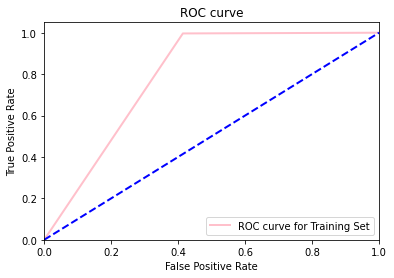

------------------------------------- 1.b(iii)(C) --------------------------------------
Confusion Matrix for Test Set in the first iteration:
 [[12 31]
 [72  0]]


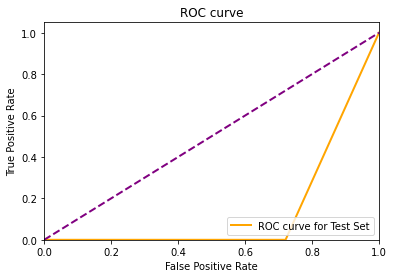

------------------------------------- 1.b(iii)(B) --------------------------------------
The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:
Average accuracy: 0.8499265785609396
Average precision: 0.8085153250571728
Average recall: 0.9971929824561404
Average F1-score: 0.8929807062844063
Average AUC: 0.7993854458631785

-------------------------------------- 1.b(iii)(C) --------------------------------------
The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:
Average accuracy: 0.5440579710144928
Average precision: 0.4637361744550711
Average recall: 0.5657407407407408
Average F1-score: 0.5091815985025697
Average AUC: 0.5367463393626185


In [166]:
from sklearn.cluster import KMeans
import random as rand

warnings.filterwarnings('ignore')
Accuracy_train = []
Precision_train = []
Recall_train = []
F1score_train = []
AUC_train = []

Accuracy_test = []
Precision_test = []
Recall_test = []
F1score_test = []
AUC_test = []

for m in range(1,31):
    B_df = df[df['Diagnosis'] == 'B']
    M_df = df[df['Diagnosis'] == 'M']
    B_train, B_test = train_test_split(B_df, test_size=0.2)
    M_train, M_test = train_test_split(M_df, test_size=0.2)
    train_set = pd.concat([B_train, M_train])
    test_set = pd.concat([B_test, M_test])

    X_train = train_set.iloc[:,2:].reset_index(drop=True)
    y_train = train_set['Diagnosis'].map({'M':0, 'B':1}).reset_index(drop=True)
    X_test = test_set.iloc[:,2:].reset_index(drop=True)
    y_test = test_set['Diagnosis'].map({'M':0, 'B':1}).reset_index(drop=True)

    kmeans = KMeans(n_clusters=2, init='random', random_state=rand.randint(0,100)).fit(X_train)

    # 1.b(iii)(B)
    cluster_centers = kmeans.cluster_centers_

    dists0 = np.linalg.norm(X_train.values-cluster_centers[0], axis=1)
    dists1 = np.linalg.norm(X_train.values-cluster_centers[1], axis=1)
    ind_closest0 = np.argsort(dists0)[:30]
    ind_closest1 = np.argsort(dists1)[:30]

    majority0 = y_train.iloc[ind_closest0].value_counts().idxmax()
    majority1 = y_train.iloc[ind_closest1].value_counts().idxmax()

    clusters = kmeans.predict(X_train)
    y_train_df = pd.DataFrame(y_train)
    y_train_df['Cluster'] = clusters

    for i in range(len(y_train_df)):
        if y_train_df['Cluster'][i] == 0:
            y_train_df['Diagnosis'][i] = majority0
        if y_train_df['Cluster'][i] == 1:
            y_train_df['Diagnosis'][i] = majority1
    y_train_pred = y_train_df['Diagnosis']

    train_as = accuracy_score(y_train, y_train_pred)
    train_ps = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    fpr, tpr, _ = roc_curve(y_train, y_train_pred)
    train_auc = auc(fpr, tpr)

    Accuracy_train.append(train_as)
    Precision_train.append(train_ps)
    Recall_train.append(train_recall)
    F1score_train.append(train_f1)
    AUC_train.append(train_auc)

    if m == 1: 
        train_cm = confusion_matrix(y_train, y_train_pred)
        print(f"------------------------------------- 1.b(iii)(B) --------------------------------------")
        print("Confusion Matrix for Training Set in the first iteration:\n", train_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve for Training Set')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()


    # 1.b(iii)(C)
    y_test_pred = kmeans.predict(X_test)
    test_as = accuracy_score(y_test, y_test_pred)
    test_ps = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    test_auc = auc(fpr, tpr)

    Accuracy_test.append(test_as)
    Precision_test.append(test_ps)
    Recall_test.append(test_recall)
    F1score_test.append(test_f1)
    AUC_test.append(test_auc)

    if m == 1: 
        test_cm = confusion_matrix(y_test, y_test_pred)
        print(f"------------------------------------- 1.b(iii)(C) --------------------------------------")
        print("Confusion Matrix for Test Set in the first iteration:\n", test_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve for Test Set')
        plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

avg_accuracy_train = np.mean(Accuracy_train)
avg_precision_train = np.mean(Precision_train)
avg_recall_train = np.mean(Recall_train)
avg_f1score_train = np.mean(F1score_train)
avg_auc_train = np.mean(AUC_train)
print(f"------------------------------------- 1.b(iii)(B) --------------------------------------")
print('The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_train}') 
print(f'Average precision: {avg_precision_train}')
print(f'Average recall: {avg_recall_train}') 
print(f'Average F1-score: {avg_f1score_train}') 
print(f'Average AUC: {avg_auc_train}\n') 

avg_accuracy_test = np.mean(Accuracy_test)
avg_precision_test = np.mean(Precision_test)
avg_recall_test = np.mean(Recall_test)
avg_f1score_test = np.mean(F1score_test)
avg_auc_test = np.mean(AUC_test)
print(f"-------------------------------------- 1.b(iii)(C) --------------------------------------")
print('The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_test}') 
print(f'Average precision: {avg_precision_test}')
print(f'Average recall: {avg_recall_test}') 
print(f'Average F1-score: {avg_f1score_test}') 
print(f'Average AUC: {avg_auc_test}') 

#### (iv) Spectral Clustering

Spectral clustering is a technique that attempts to overcome the linear boundary problem and the problem of determining the cluster centroid of k-means clustering.

------------------------------------- 1.b(iv)(B) --------------------------------------
Confusion Matrix for Training Set in the first iteration:
 [[139  30]
 [ 14 271]]


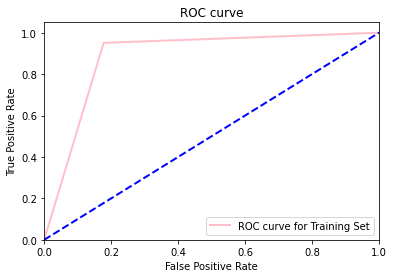

------------------------------------- 1.b(iv)(C) --------------------------------------
Confusion Matrix for Test Set in the first iteration:
 [[ 7 36]
 [68  4]]


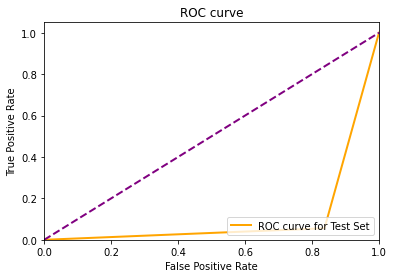

------------------------------------- 1.b(iv)(B) --------------------------------------
The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:
Average accuracy: 0.8988252569750368
Average precision: 0.89762373026594
Average recall: 0.9469005847953216
Average F1-score: 0.9215788639743362
Average AUC: 0.8823260320426312

-------------------------------------- 1.b(iv)(C) --------------------------------------
The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:
Average accuracy: 0.5289855072463768
Average precision: 0.5271654791950753
Average recall: 0.536574074074074
Average F1-score: 0.528270029566725
Average AUC: 0.526426571920758


In [394]:
from sklearn.cluster import SpectralClustering

warnings.filterwarnings('ignore')
Accuracy_train = []
Precision_train = []
Recall_train = []
F1score_train = []
AUC_train = []

Accuracy_test = []
Precision_test = []
Recall_test = []
F1score_test = []
AUC_test = []

for m in range(1,31):
    df =  pd.read_csv('data/wdbc.data', header=None)
    df.columns=['ID','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
    X = df.drop(['ID','Diagnosis'],axis=1)
    X_normalized = pd.DataFrame(preprocessing.normalize(X),columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30'])
    df_normalized = pd.concat([df[['Diagnosis']],X_normalized],axis=1)

    B_df = df_normalized[df_normalized['Diagnosis'] == 'B']
    M_df = df_normalized[df_normalized['Diagnosis'] == 'M']
    B_train, B_test = train_test_split(B_df, test_size=0.2)
    M_train, M_test = train_test_split(M_df, test_size=0.2)
    train_set = pd.concat([B_train, M_train])
    test_set = pd.concat([B_test, M_test])

    X_train = train_set.iloc[:,2:].reset_index(drop=True)
    y_train = train_set['Diagnosis'].map({'M':0, 'B':1}).reset_index(drop=True)
    X_test = test_set.iloc[:,2:].reset_index(drop=True)
    y_test = test_set['Diagnosis'].map({'M':0, 'B':1}).reset_index(drop=True)


    # 1.b(iv)(B)
    sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, eigen_tol=1.0, assign_labels='discretize')
    sc.fit_predict(X_train)
    spec_labels = pd.DataFrame(sc.labels_)
    ind_label0= spec_labels[spec_labels[0]==0].index 
    ind_label1= spec_labels[spec_labels[0]==1].index

    majority0 = y_train.iloc[ind_label0].value_counts().idxmax()
    majority1 = y_train.iloc[ind_label1].value_counts().idxmax()

    y_train_df = pd.DataFrame(y_train)
    y_train_df['Cluster'] = spec_labels

    for i in range(len(y_train_df)):
        if y_train_df['Cluster'][i] == 0:
            y_train_df['Diagnosis'][i] = majority0
        if y_train_df['Cluster'][i] == 1:
            y_train_df['Diagnosis'][i] = majority1
    y_train_pred = y_train_df['Diagnosis']

    train_as = accuracy_score(y_train, y_train_pred)
    train_ps = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    fpr, tpr, _ = roc_curve(y_train, y_train_pred)
    train_auc = auc(fpr, tpr)

    Accuracy_train.append(train_as)
    Precision_train.append(train_ps)
    Recall_train.append(train_recall)
    F1score_train.append(train_f1)
    AUC_train.append(train_auc)

    if m == 1: 
        train_cm = confusion_matrix(y_train, y_train_pred)
        print(f"------------------------------------- 1.b(iv)(B) --------------------------------------")
        print("Confusion Matrix for Training Set in the first iteration:\n", train_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve for Training Set')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()


    # 1.b(iv)(C)
    y_test_pred = sc.fit_predict(X_test)
    test_as = accuracy_score(y_test, y_test_pred)
    test_ps = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    test_auc = auc(fpr, tpr)

    Accuracy_test.append(test_as)
    Precision_test.append(test_ps)
    Recall_test.append(test_recall)
    F1score_test.append(test_f1)
    AUC_test.append(test_auc)

    if m == 1: 
        test_cm = confusion_matrix(y_test, y_test_pred)
        print(f"------------------------------------- 1.b(iv)(C) --------------------------------------")
        print("Confusion Matrix for Test Set in the first iteration:\n", test_cm)
        plt.figure()
        plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve for Test Set')
        plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

avg_accuracy_train = np.mean(Accuracy_train)
avg_precision_train = np.mean(Precision_train)
avg_recall_train = np.mean(Recall_train)
avg_f1score_train = np.mean(F1score_train)
avg_auc_train = np.mean(AUC_train)
print(f"------------------------------------- 1.b(iv)(B) --------------------------------------")
print('The average accuracy, precision, recall, F1-score, and AUC for training set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_train}') 
print(f'Average precision: {avg_precision_train}')
print(f'Average recall: {avg_recall_train}') 
print(f'Average F1-score: {avg_f1score_train}') 
print(f'Average AUC: {avg_auc_train}\n') 

avg_accuracy_test = np.mean(Accuracy_test)
avg_precision_test = np.mean(Precision_test)
avg_recall_test = np.mean(Recall_test)
avg_f1score_test = np.mean(F1score_test)
avg_auc_test = np.mean(AUC_test)
print(f"-------------------------------------- 1.b(iv)(C) --------------------------------------")
print('The average accuracy, precision, recall, F1-score, and AUC for test set over 30 runs:')
print(f'Average accuracy: {avg_accuracy_test}') 
print(f'Average precision: {avg_precision_test}')
print(f'Average recall: {avg_recall_test}') 
print(f'Average F1-score: {avg_f1score_test}') 
print(f'Average AUC: {avg_auc_test}') 

#### (v) Compare

In [406]:
from tabulate import tabulate

mydata = [
    ["Average accuracy for training set", 0.98884, 0.99574, 0.84993, 0.89883],
    ["Average accuracy for test set", 0.96145, 0.95536, 0.54406, 0.52899],
    ["Average precision for training set", 0.98703, 0.99557, 0.80852, 0.89762],
    ["Average precision for test set", 0.96218, 0.96348, 0.46374, 0.52717],
    ["Average recall for training set", 0.99532, 0.99764, 0.99719, 0.94690],
    ["Average recall for test set", 0.97731, 0.96574, 0.56574, 0.53657],
    ["Average F1-score for training set", 0.99115, 0.99659, 0.89298, 0.92158],
    ["Average F1-score for test set", 0.96952, 0.96439, 0.50918, 0.52827],
    ["Average AUC for training set", 0.98662, 0.99510, 0.79939, 0.88233],
    ["Average AUC for test set", 0.95610, 0.95186, 0.53675, 0.52643]

]
head = ['','Supervised Learning','Semi-Supervised Learning','Unsupervised Learning','Spectral Clustering']
print(tabulate(mydata, headers=head, tablefmt="grid"))

print("\nBased on the summary table above, we can conclude that supervised learning on full dataset is working better than semi-supervised learning with half of the data set labeled. Also, unsupervised learning is underperforming on this dataset.")

+------------------------------------+-----------------------+----------------------------+-------------------------+-----------------------+
|                                    |   Supervised Learning |   Semi-Supervised Learning |   Unsupervised Learning |   Spectral Clustering |
+====================================+=======================+============================+=========================+=======================+
| Average accuracy for training set  |               0.98884 |                    0.99574 |                 0.84993 |               0.89883 |
+------------------------------------+-----------------------+----------------------------+-------------------------+-----------------------+
| Average accuracy for test set      |               0.96145 |                    0.95536 |                 0.54406 |               0.52899 |
+------------------------------------+-----------------------+----------------------------+-------------------------+-----------------------+
| Aver

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [307]:
df = pd.read_csv('data/data_banknote_authentication.txt',header=None)
df.columns=['image variance', 'image skewness', 'image curtosis', 'image entropy', 'class']

test_data = df.sample(472,random_state=rand.randint(0,100))
test_index = test_data.index
train_data = df.drop(index=test_index)
test_data = test_data.reset_index(drop=True)

X_test = test_data.drop('class',axis=1)
y_test = test_data['class'] 
X_train = train_data.drop('class',axis=1)
y_train = train_data['class'] 


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [257]:
sum_ts = []

for m in range(1,51):
    TestErrors = []
    poll = pd.DataFrame()
    while len(poll) != 900:
        add_data = train_data.sample(10)
        poll = pd.concat([poll, add_data])
        X_poll = poll.drop('class',axis=1)
        y_poll = poll['class']

        C = np.logspace(-3, 6, 10) 
        lsvc = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
        clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=5)
        clf.fit(X_poll, y_poll)
        c_l1 = clf.best_estimator_.C 

        lsvc = LinearSVC(penalty='l1', dual=False, C=c_l1)
        lsvc.fit(X_poll, y_poll)

        y_test_pred = lsvc.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        TestErrors.append(test_error)

    sum_ts.append(TestErrors)

avg_ts = [sum(x)/len(x) for x in zip(*sum_ts)]
print("Average the 50 test errors for each of the 90 SVMs for passive learning\n:", avg_ts)

Average the 50 test errors for each of the 90 SVMs: [0.14860169491525427, 0.06881355932203388, 0.04991525423728815, 0.02872881355932203, 0.025550847457627125, 0.02360169491525424, 0.020635593220338987, 0.020847457627118635, 0.019025423728813547, 0.01885593220338982, 0.01733050847457626, 0.01716101694915253, 0.016101694915254216, 0.01584745762711862, 0.014406779661016928, 0.013813559322033873, 0.014110169491525397, 0.013432203389830477, 0.013347457627118616, 0.012245762711864384, 0.012499999999999973, 0.012542372881355903, 0.013008474576271155, 0.011864406779660988, 0.012203389830508447, 0.012203389830508447, 0.01131355932203387, 0.010677966101694887, 0.010423728813559295, 0.010211864406779634, 0.010127118644067769, 0.01067796610169489, 0.010847457627118617, 0.010974576271186413, 0.010254237288135565, 0.010169491525423702, 0.009999999999999974, 0.009745762711864382, 0.009830508474576245, 0.009957627118644041, 0.009745762711864382, 0.009618644067796585, 0.009745762711864382, 0.0097881355

#### (ii) Active

In [333]:
warnings.filterwarnings('ignore')
sum_ts2 = []

for m in range(1,51):
    df = pd.read_csv('data/data_banknote_authentication.txt',header=None)
    df.columns=['image variance', 'image skewness', 'image curtosis', 'image entropy', 'class']

    test_data = df.sample(472,random_state=rand.randint(0,100)).reset_index(drop=True)
    test_index = test_data.index
    train_data = df.drop(index=test_index).reset_index(drop=True)

    X_train = train_data.drop('class',axis=1)
    y_train = train_data['class'] 
    X_test = test_data.drop('class',axis=1)
    y_test = test_data['class'] 

    TestErrors = []
    poll = pd.DataFrame()

    while True:
        poll = train_data.sample(10)
        if len(poll['class'].unique()) > 1:
            break
    X_poll = poll.drop('class',axis=1)
    y_poll = poll['class']
    X_train = X_train.drop(index = poll.index.values, axis = 0).reset_index(drop=True)
    train_data = train_data.drop(index = poll.index.values, axis = 0).reset_index(drop=True)
    
    C = np.logspace(-3, 6, 10) 
    lsvc = LinearSVC(penalty='l1', dual=False, max_iter=10000000)
    clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=5)
    clf.fit(X_poll, y_poll)
    c_l1 = clf.best_estimator_.C 

    lsvc = LinearSVC(penalty='l1', dual=False, C=c_l1)
    lsvc.fit(X_poll, y_poll)
    y_test_pred = lsvc.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    TestErrors.append(test_error)
    
    while len(poll) != 900:
        C = np.logspace(-3, 6, 10) 
        lsvc = LinearSVC(penalty='l1', dual=False, max_iter=10000000)
        clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=5)
        clf.fit(X_poll, y_poll)
        c_l1 = clf.best_estimator_.C 

        lsvc = LinearSVC(penalty='l1', dual=False, C=c_l1)
        lsvc.fit(X_poll, y_poll)

        y_test_pred = lsvc.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        TestErrors.append(test_error)

        dists = lsvc.decision_function(X_train)
        absdists = np.abs(dists)
        closest10_ind = absdists.argsort()[:10]
        add_data = train_data.iloc[closest10_ind,:]
        poll = pd.concat([poll, add_data])
        X_poll = poll.drop('class',axis=1)
        y_poll = poll['class']    

        X_train = X_train.drop(index = closest10_ind, axis = 0).reset_index(drop=True)
        train_data = train_data.drop(index = closest10_ind, axis = 0).reset_index(drop=True)

    sum_ts2.append(TestErrors)

avg_ts2 = [sum(x)/len(x) for x in zip(*sum_ts2)]
print("Average the 50 test errors for each of the 90 SVMs for active learning:\n", avg_ts2)

/Users/luoxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luoxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luoxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luoxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average the 50 test errors for each of the 90 SVMs for active learning:
 [0.13919491525423727, 0.14466101694915257, 0.06360169491525423, 0.03355932203389831, 0.02088983050847456, 0.015254237288135577, 0.011440677966101676, 0.009745762711864383, 0.010338983050847435, 0.012542372881355908, 0.010974576271186415, 0.012118644067796584, 0.01220338983050845, 0.012923728813559304, 0.01237288135593218, 0.012838983050847432, 0.012711864406779636, 0.01275423728813557, 0.01262711864406777, 0.013305084745762688, 0.013177966101694891, 0.013262711864406758, 0.013093220338983027, 0.013983050847457603, 0.013644067796610142, 0.014194915254237264, 0.014152542372881332, 0.01432203389830506, 0.014406779661016923, 0.01453389830508472, 0.01432203389830506, 0.014618644067796584, 0.014661016949152516, 0.014999999999999973, 0.014830508474576246, 0.014830508474576246, 0.014830508474576246, 0.014872881355932177, 0.01470338983050845, 0.014491525423728788, 0.014618644067796584, 0.014194915254237264, 0.0141949152542

### (c) Average the 50 test errors

From 2(b)i and 2(b)ii, we averaged the 50 test errors for each of the incrementally trained 90 SVMs.
     Passive Learning  Active Learning
10           0.148602         0.139195
20           0.068814         0.144661
30           0.049915         0.063602
40           0.028729         0.033559
50           0.025551         0.020890
..                ...              ...
860          0.009195         0.012797
870          0.009195         0.012924
880          0.009195         0.012542
890          0.009153         0.012585
900          0.009195         0.011907

[90 rows x 2 columns]

By plot average test error versus number of training instances for both active and passive learners on the figure below,
we can conclude that passive learning needs more data points to be trained to get the the lowest test error.



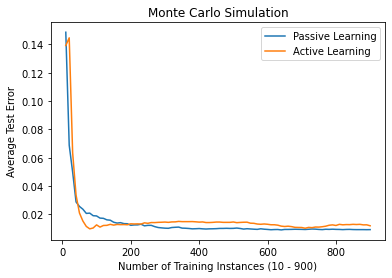

In [359]:
print("From 2(b)i and 2(b)ii, we averaged the 50 test errors for each of the incrementally trained 90 SVMs.")

plot_df = pd.DataFrame({'Passive Learning': avg_ts , 'Active Learning':avg_ts2})
plot_df = plot_df.rename(index = lambda s: (s+1)*10)
print(plot_df)
ax = plot_df.plot(style='-',title='Monte Carlo Simulation')
ax.set_xlabel("Number of Training Instances (10 - 900)")
ax.set_ylabel("Average Test Error")

print('''
By plot average test error versus number of training instances for both active and passive learners on the figure below,
we can conclude that passive learning needs more data points to be trained to get the the lowest test error.
''')